In [242]:
import sys, os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy

if not '../' in sys.path:
    sys.path.insert(1, '../')

In [243]:

from matplotlib.markers import MarkerStyle
from matplotlib.textpath import TextPath


def plot_ancillas_bar(x_axis, ex_uncomp_avg, gf_uncomp_avg, gp_uncomp_avg, figname='NEEDFIGNAME', image_write_path='NEED_IMAGE_PATH',
                 title='Number of Ancillas Uncomputed', 
                 xlabel = 'Total Number of Ancillas', xfont=14,
                 ylabel = 'Average Number of Ancillas Uncomputed', yfont=14):
    

    x = numpy.arange(len(x_axis))  # the label locations
    width = 0.3  # the width of the bars

    num_elements = len(x_axis)
    base_width = 6  # Minimum width
    width_per_element = 0.5  # Additional width per element
    total_width = max(base_width, base_width + (num_elements - 10) * width_per_element)
    

    fig, ax = plt.subplots(figsize=(total_width, 6))
    # rects1 = ax.bar(x - 1.5 * width, ex_comp_avg, width, label='No Uncomputation')
    rects2 = ax.bar(x - 0.5 * width, ex_uncomp_avg, width/3, label='Exhaustive', color=mcolors.CSS4_COLORS['orange'])
    rects3 = ax.bar(x, gf_uncomp_avg, width/3, label='Greedy-Full', color=mcolors.CSS4_COLORS['forestgreen'])
    rects4 = ax.bar(x + 0.5 * width, gp_uncomp_avg, width/3, label='Greedy-Partial', color=mcolors.CSS4_COLORS['magenta'])

    ax.set_xlabel(xlabel, fontdict={'fontsize':xfont})
    ax.set_ylabel(ylabel, fontdict={'fontsize':xfont})
    # ax.set_title('Multiple Bar Plots')
    ax.set_xticks(x)
    uni_I = ''
    uni_K = ''

    ax.set_xticklabels(x_axis)
    ax.legend(bbox_to_anchor=(0, 1.01, 1, 0.2), loc='lower left',
            ncol=5, mode="expand", borderaxespad=0)
    
    all_data = ex_uncomp_avg+gf_uncomp_avg+gp_uncomp_avg  # Combine all data
    min_value = min(all_data)
    max_value = max(all_data)

    # Calculate the y-axis limits
    y_min = min(0, min_value - 0.1 * min_value)  # 10% below the smallest value or 0, whichever is smaller
    y_max = max_value + 0.1 * max_value  # 10% above the largest value

    # Set the y-axis limits
    ax.set_ylim(y_min, y_max)

    # Add some padding to the top and bottom of the plot
    plt.margins(y=0.1)

    # Show the plot
    plt.tight_layout()
    # plt.savefig(f'{image_write_path}/{figname}')
    plt.show()
    # plt.close()


def plot_ancilla_results(x_axis, ex_uncomp_avg, gf_uncomp_avg, gp_uncomp_avg, og=None, 
                         figname='NEEDFIGNAME', image_write_path='../qcnc_paper_figures/evaluation',
                 title='Number of Ancillas Uncomputed', 
                 xlabel = 'Total Number of Ancillas', xfont=24,
                 ylabel = 'Average Ancillae Uncomputed', yfont=24,
                 legends=False):

    fig, ax = plt.subplots(figsize=(8,6))

    if og is not None:
        ax.plot(x_axis, og, marker='o', markersize=12,
                 linestyle='-', label='No Uncomputation', color=mcolors.CSS4_COLORS['red'])
        ax.plot(x_axis, ex_uncomp_avg, marker='o', markersize=12, 
                linestyle='-', label='Exhaustive', color=mcolors.CSS4_COLORS['darkorange'])
        ax.plot(x_axis, gf_uncomp_avg, marker='o', markersize=8,
                linestyle='-', label='Greedy-Full', color=mcolors.CSS4_COLORS['forestgreen'])
        ax.plot(x_axis, gp_uncomp_avg, marker='o', markersize=4,
                linestyle='-', label='Greedy-Partial', color=mcolors.CSS4_COLORS['mediumblue'])
        ax.legend(bbox_to_anchor=(0, 1.01, 1, 0.2), loc='lower left',
                ncol=5, mode="expand", borderaxespad=0)

    else:
        ax.plot(x_axis, ex_uncomp_avg, marker='o', markersize=15, 
             linestyle='-', label='Exhaustive', color=mcolors.CSS4_COLORS['darkorange'])
        ax.plot(x_axis, gf_uncomp_avg, marker='o', markersize=10,
             linestyle='-', label='Greedy-Full', color=mcolors.CSS4_COLORS['forestgreen'])
        ax.plot(x_axis, gp_uncomp_avg, marker='o', markersize=5,
             linestyle='-', label='Greedy-Partial', color=mcolors.CSS4_COLORS['mediumblue'])

    # plt.xticks(numpy.arange(len(x_axis)), x_axis)
    # plt.set_xticklabels(x_axis)

    
#     plt.xlabel(xlabel, fontsize=xfont)
#     plt.ylabel(ylabel, fontsize=yfont)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)


    ax.set_xlabel(xlabel, fontsize=xfont)
    ax.set_ylabel(ylabel, fontsize=yfont)    # plt.title(title)
    # ax.set_yticklabels(list(range(0,12)))
#     ax.set_xticklabels()
    # fig = plt.show()
    # plt.figure(figsize=)
#     plt.xlim(x_axis[0]-1, x_axis[-1]+1)
#     plt.ticklabel_format('{x:.0f}')
#     fig, ax = plt.subplots()
#     ax.plot
#     plt.autoscale(False, axis='x')
    # plt.xscale('linear')
    # if legends:
    #     plt.legend(bbox_to_anchor=(0, 1.01, 1, 0.2), loc='lower left',
    #         ncol=5, mode="expand", borderaxespad=0)
    #     # fig, ax = plt.plot()
        
    plt.tight_layout()
    plt.savefig(os.path.abspath(f'{image_write_path}/{figname}'))
    plt.show()
#     plt.close()



Graph 1 - Varying Ancillas

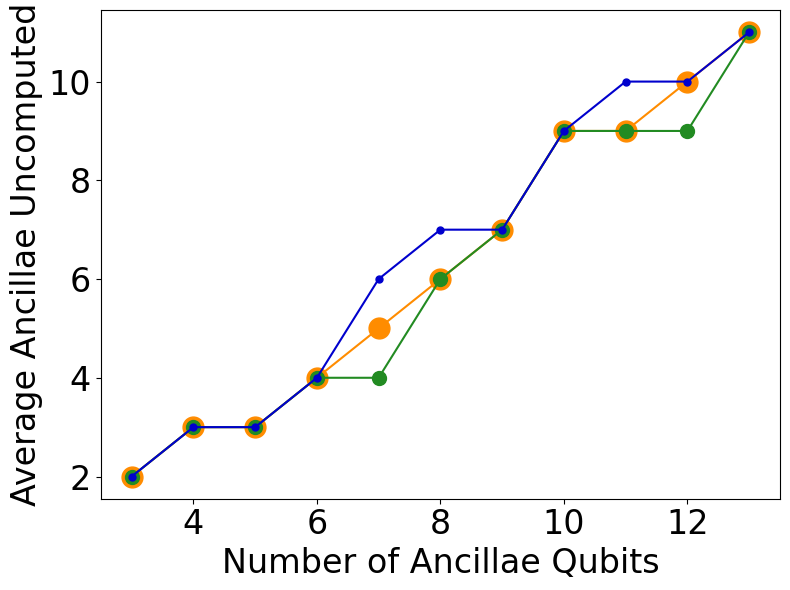

In [244]:
x_axis_1 = [i for i in range(3,14)]
ex_1 = [2,3,3,4,5,6,7,9,9,10,11]
gf_1 = [2,3,3,4,4,6,7,9,9,9,11]
gp_1 = [2,3,3,4,6,7,7,9,10,10,11]

# plot_ancillas_bar(x_axis_1,ex_1,gf_1,gp_1, 
#                   xlabel='Ancillae Qubits')
plot_ancilla_results(x_axis_1,ex_1,gf_1,gp_1, 
                  xlabel='Number of Ancillae Qubits', 
                  figname='Plot_NumAncilla_line')


Graph 2 - Varying Inputs

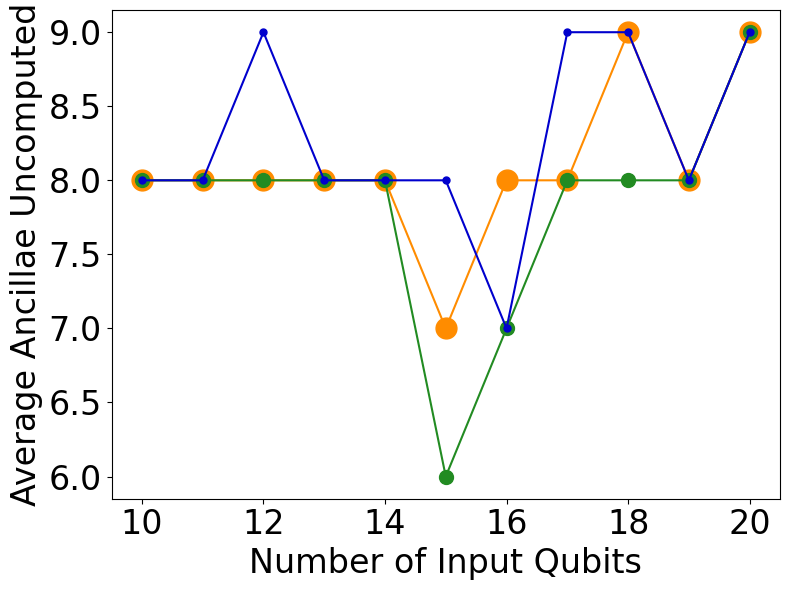

In [245]:
x_axis_2 = [i for i in range(10,21)]
ex_2 = [8,8,8,8,8,7,8,8,9,8,9]
gf_2 = [8,8,8,8,8,6,7,8,8,8,9]
gp_2 = [8,8,9,8,8,8,7,9,9,8,9]

# plot_ancillas_bar(x_axis_2,ex_2,gf_2,gp_2, 
#                   xlabel='Input Qubits')
plot_ancilla_results(x_axis_2,ex_2,gf_2,gp_2, 
                  xlabel='Number of Input Qubits', 
                  figname='Plot_NumInput_line')


Graph 3 - Number of CNOT Gates

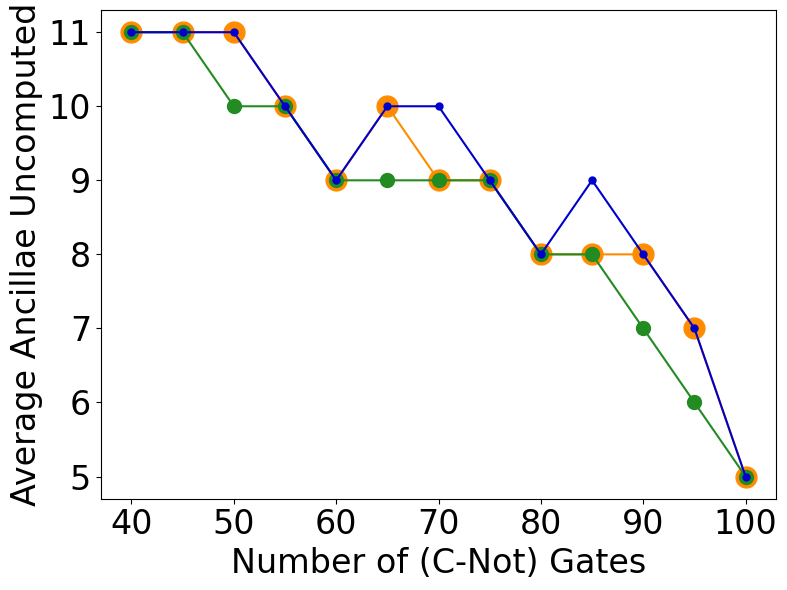

In [246]:
x_axis_3 = [i for i in range(40,105,5)]
ex_3 = [11,11,11,10,9,10,9,9,8,8,8,7,5]
gf_3 = [11,11,10,10,9,9,9,9,8,8,7,6,5]
gp_3 = [11,11,11,10,9,10,10,9,8,9,8,7,5]

# plot_ancillas_bar(x_axis_3,ex_3,gf_3,gp_3, 
#                   xlabel='(C-Not) Gates')
plot_ancilla_results(x_axis_3,ex_3,gf_3,gp_3, 
                  xlabel='Number of (C-Not) Gates', 
                  figname='Plot_NumGate_line')


Varying Percentage - Ancilla-Ancilla

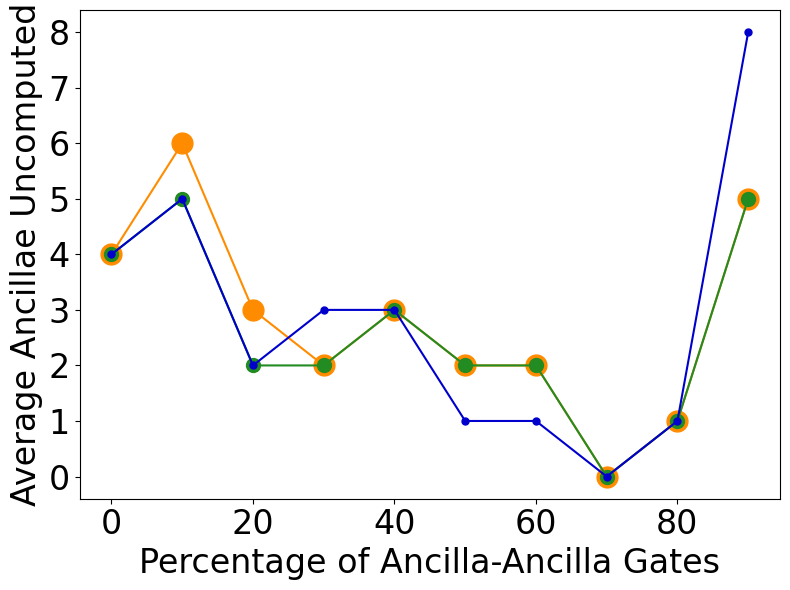

In [247]:
x_axis_4 = [i for i in range(0,100,10)]
ex_4 = [4,6,3,2,3,2,2,0,1,5]
gf_4 = [4,5,2,2,3,2,2,0,1,5]
gp_4 = [4,5,2,3,3,1,1,0,1,8]

# plot_ancillas_bar(x_axis_4,ex_4,gf_4,gp_4, 
#                   xlabel='Percentage of Ancilla-Ancilla Gates')
plot_ancilla_results(x_axis_4,ex_4,gf_4,gp_4, 
                  xlabel='Percentage of Ancilla-Ancilla Gates', 
                  figname='Plot_PercentAnAnGate_line')



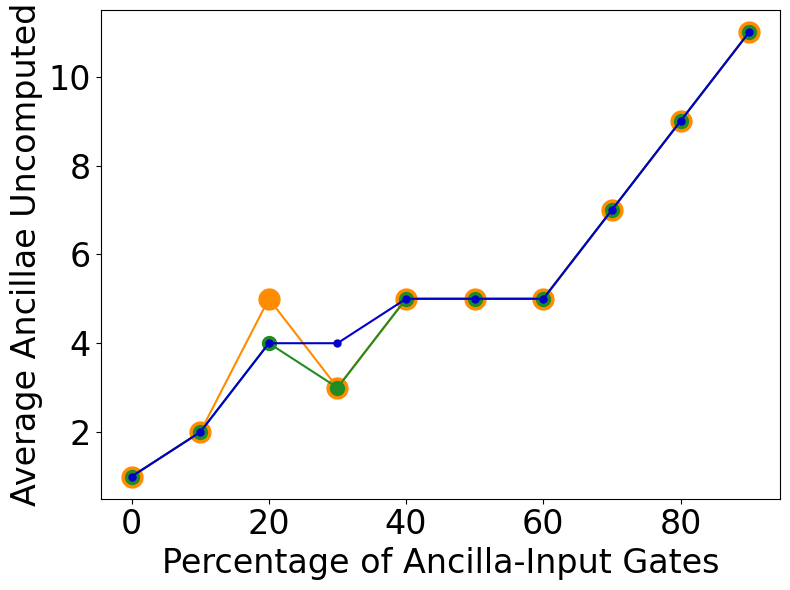

In [248]:
x_axis_5 = [i for i in range(0,100,10)]
ex_5 = [1,2,5,3,5,5,5,7,9,11]
gf_5 = [1,2,4,3,5,5,5,7,9,11]
gp_5 = [1,2,4,4,5,5,5,7,9,11]

# plot_ancillas_bar(x_axis_5,ex_5,gf_5,gp_5, 
#                   xlabel='Percentage of Ancilla-Input Gates')
plot_ancilla_results(x_axis_5,ex_5,gf_5,gp_5, 
                  xlabel='Percentage of Ancilla-Input Gates', 
                  figname='Plot_PercentAnInGate_line')


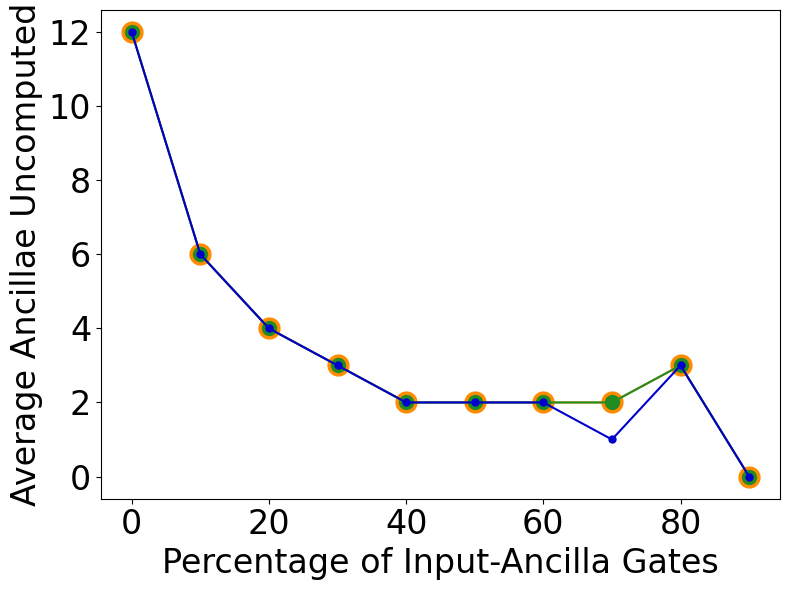

In [249]:
x_axis_6 = [i for i in range(0,100,10)]
ex_6 = [12,6,4,3,2,2,2,2,3,0]
gf_6 = [12,6,4,3,2,2,2,2,3,0]
gp_6 = [12,6,4,3,2,2,2,1,3,0]

# plot_ancillas_bar(x_axis_6,ex_6,gf_6,gp_6, 
#                   xlabel='Percentage of Input-Ancilla Gates')
plot_ancilla_results(x_axis_6,ex_6,gf_6,gp_6, 
                  xlabel='Percentage of Input-Ancilla Gates', 
                  figname='Plot_PercentInAnGate_line')


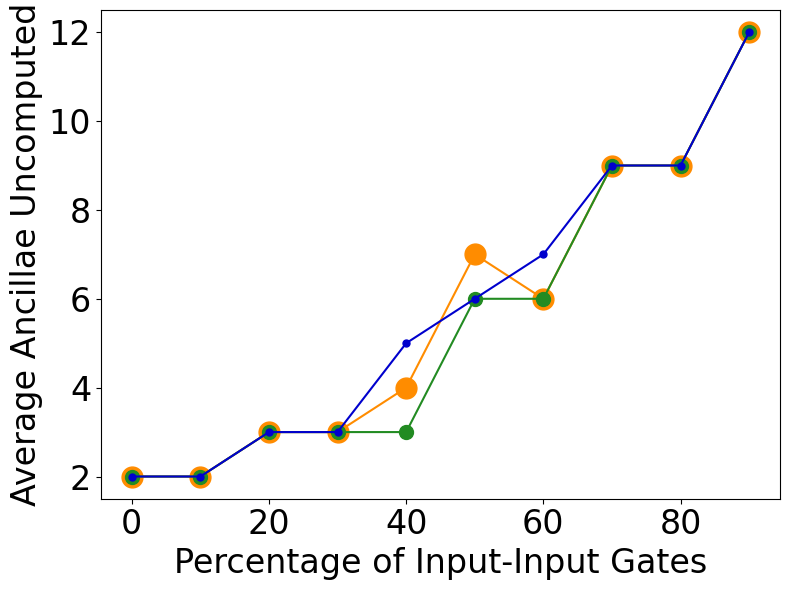

In [250]:
x_axis_7 = [i for i in range(0,100,10)]
ex_7 = [2,2,3,3,4,7,6,9,9,12]
gf_7 = [2,2,3,3,3,6,6,9,9,12]
gp_7 = [2,2,3,3,5,6,7,9,9,12]

# plot_ancillas_bar(x_axis_7,ex_7,gf_7,gp_7, 
#                   xlabel='Percentage of Input-Input Gates')
plot_ancilla_results(x_axis_7,ex_7,gf_7,gp_7, 
                  xlabel='Percentage of Input-Input Gates', 
                  figname='Plot_PercentInInGate_line')


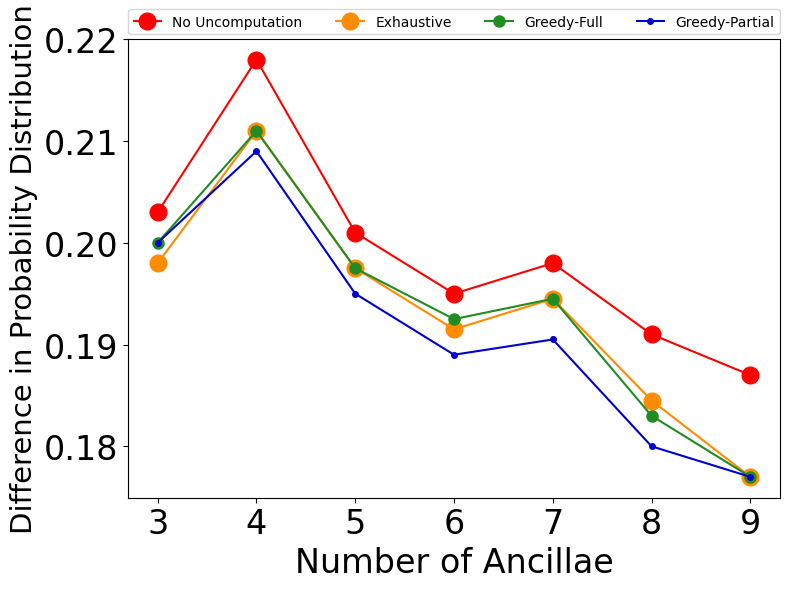

In [251]:
x_axis_p = [i for i in range(3,10)]
og_p = [0.203, 0.218, 0.201, 0.195, 0.198, 0.191, 0.187]
ex_p = [0.198, 0.211, 0.1975, 0.1915, 0.1945, 0.1845, 0.177]
gf_p = [0.2, 0.211, 0.1975, 0.1925, 0.1945, 0.183, 0.177]
gp_p = [0.2, 0.209, 0.195, 0.189, 0.1905, 0.180, 0.177]

# plot_ancillas_bar(x_axis_7,ex_7,gf_7,gp_7, 
#                   xlabel='Percentage of Input-Input Gates')
plot_ancilla_results(x_axis_p,ex_p,gf_p,gp_p, og=og_p,
                  xlabel='Number of Ancillae',
                  ylabel='Difference in Probability Distribution', 
                  figname='Plot_ProbAncillae_line', 
                  yfont=21)


In [252]:
import matplotlib.patches as mpatches

fig_legend = plt.figure(figsize=(11, 0.3))
labels = ['Exhaustive', 'Greedy-Full', 'Greedy-Partial']
colors = [mcolors.CSS4_COLORS['darkorange'],mcolors.CSS4_COLORS['forestgreen'],mcolors.CSS4_COLORS['mediumblue']]
patches = [mpatches.Patch(color=color, label=label) 
           for label, color in zip(labels, colors)]

fig_legend.legend(patches, labels, loc='center',
                    ncol=5, mode="expand", borderaxespad=0, 
                    frameon=False)
# fig_legend.tight_layout()
fig_legend.savefig(os.path.abspath('../qcnc_paper_figures/evaluation/AverageAncillaeLegend'))

<Figure size 1100x30 with 0 Axes>